In [41]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
from utils import ECDF
from data import load_decay
import pandas as pd
import theano.tensor as tt

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
np.random.seed(42)

df = load_decay()
df.head(5)

,t,activity
0,0,62.496714
1,1,61.033020
2,2,61.001703
3,3,61.071062
4,4,58.519029


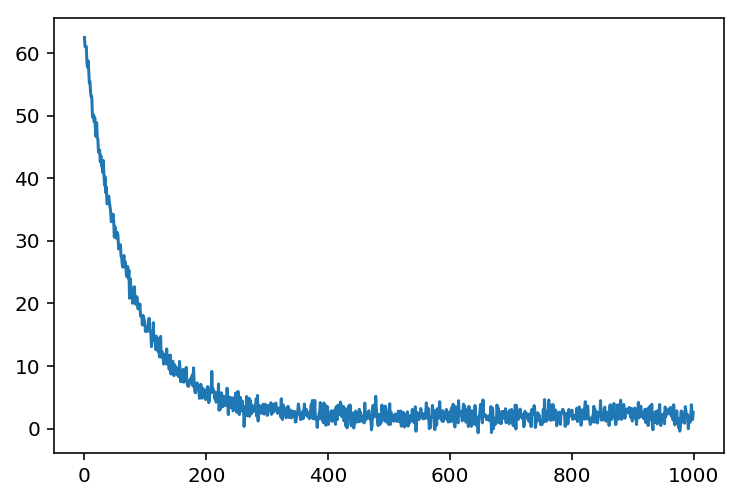

In [43]:
ax = df['activity'].plot()
# ax.set_ylim(30, 40)

In [44]:
with pm.Model() as model:
    A = pm.HalfNormal('A', sd=100)
    tau = pm.Exponential('tau', lam=1)
    C = pm.Normal('C', sd=100)
    
    sd = pm.HalfCauchy('sd', beta=1)
    
    link = A * np.exp(-df['t'].values / tau) + C
    
    like = pm.Normal('activity', mu=link, sd=sd, observed=df['activity'].values)

In [47]:
with model:
    trace = pm.sample(2000, tune=2000)
    # Note: Sampler may pause for a while after finishing

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, C, tau_log__, A_log__]
100%|██████████| 4000/4000 [00:08<00:00, 450.39it/s]


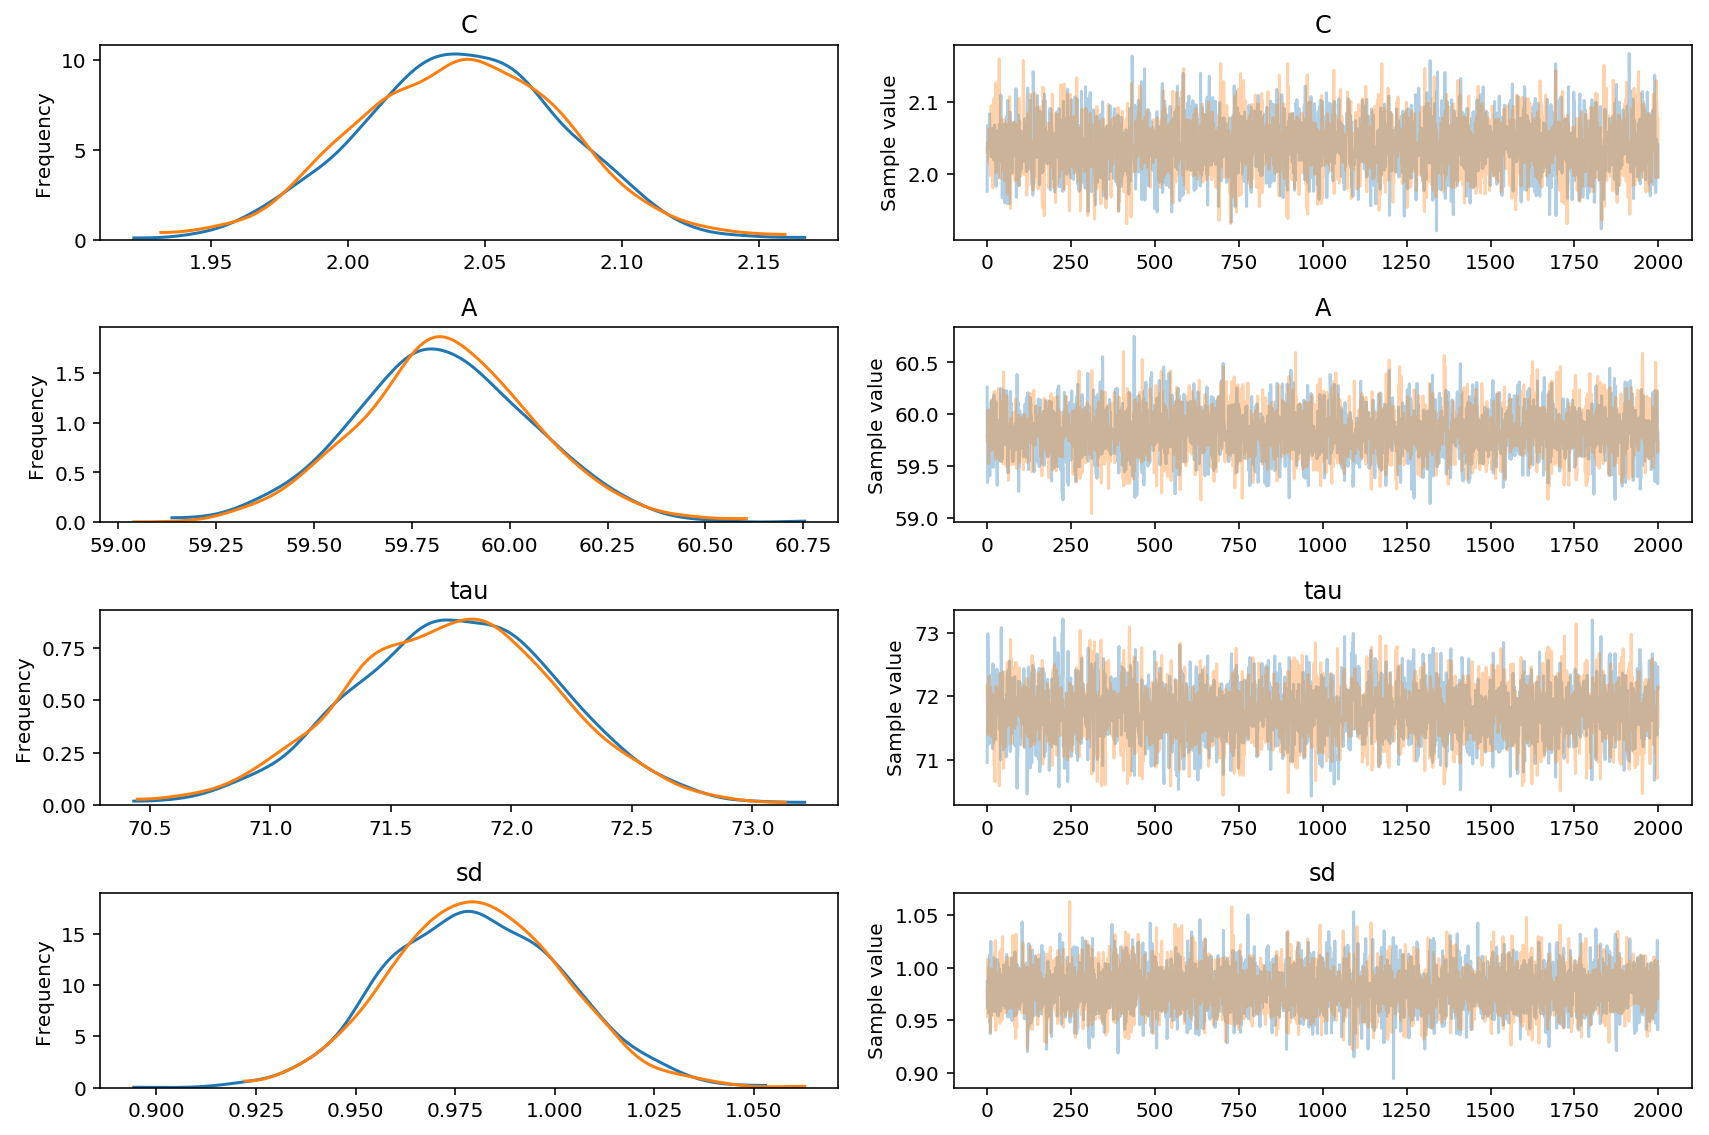

In [48]:
traces = pm.traceplot(trace)
# despine_trace(traces)